Reading in the file
By first importing pandas

In [2]:
import pandas as pd

Reading in the data frame using pandas function read_xcel

In [3]:
Germination_df = pd.read_excel('Germination_Repeat_2025.xlsx')

Testing to se if the data frame got imported right.

In [4]:
print(Germination_df.head())

   Line  Generation  Temperature  Plate  Row  Seed       Sown  \
0     1           1           22      1    1     1 2025-10-08   
1     1           1           22      1    1     2 2025-10-08   
2     1           1           22      1    1     3 2025-10-08   
3     1           1           22      1    1     4 2025-10-08   
4     1           1           22      1    1     5 2025-10-08   

  Put_in_growth_cabinet  Germinated       Identity  Kolonne1  
0            2025-10-14         1.0  L1G1T22P1R1S1       NaN  
1            2025-10-14         1.0  L1G1T22P1R1S2       NaN  
2            2025-10-14         2.0  L1G1T22P1R1S3       NaN  
3            2025-10-14         1.0  L1G1T22P1R1S4       NaN  
4            2025-10-14         2.0  L1G1T22P1R1S5       NaN  


Want to make graphs to show the differences between the different generations and lines according to temperature, so need to group them by themperature.
Might want to make a new variable that is the sorted version.

In [9]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np

Trying the code used in an erlier germination to see how the data looks.

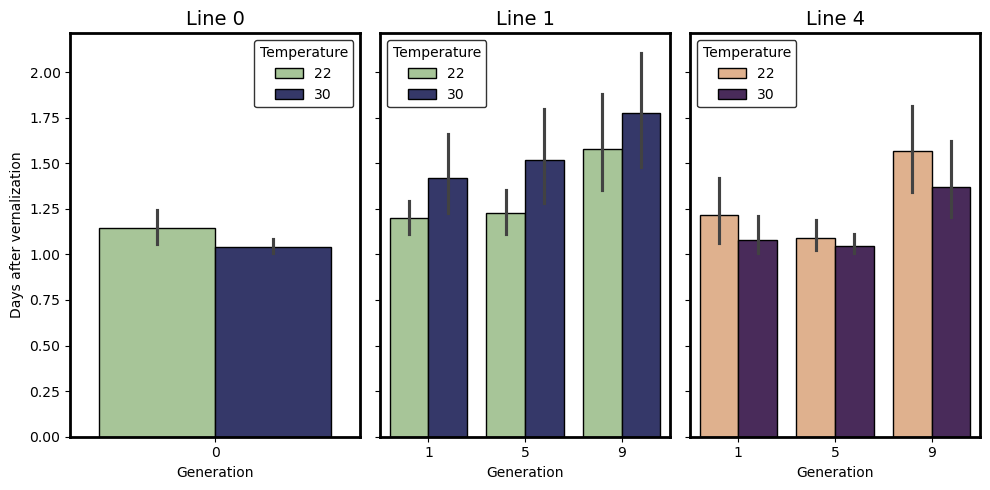

In [11]:
plt.rcParams['axes.linewidth'] = 2

f, axes = plt.subplots(ncols = 3, figsize = (10, 5), sharey = True)

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 0],
            hue = 'Temperature', ax = axes[0], edgecolor = 'black', palette ="crest")

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 1], 
            hue = 'Temperature', ax = axes[1], edgecolor = 'black', palette ="crest")

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 4], 
            hue = 'Temperature', ax = axes[2], edgecolor = 'black', palette ="flare")

axes[0].set_title('Line 0', fontsize=14)
axes[1].set_title('Line 1', fontsize=14)
axes[2].set_title('Line 4', fontsize=14, y=1)
axes[0].set(ylabel="Days after vernalization")
axes[0].legend(edgecolor = 'black', fontsize=12 , title="Temperature" ).set_visible(True)
#for ax in axes:

 #   ax.legend().set_visible(False)

  #  ax.set_ylabel('')

  #  ax.grid()

  #  ax.set_axisbelow(True)

  #  ax.set_ylim(0)

axes[0].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[1].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[2].legend(edgecolor = 'black', title="Temperature").set_visible(True)


#plt.title("Average days to germinate after vernalization for each line,generation, and temperature", y=1.05)
plt.tight_layout()
plt.show()

The old code was modified to funciton, however it is a bit noisy

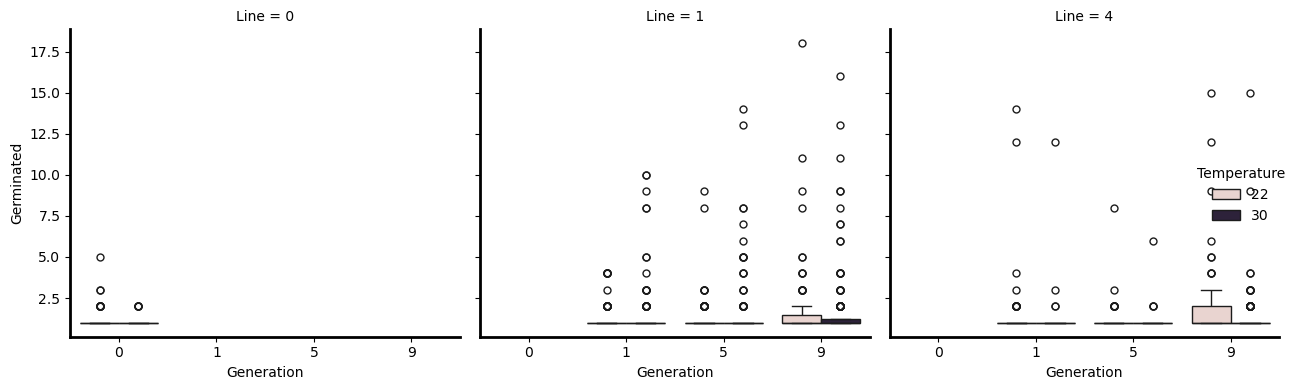

In [12]:
sns.catplot(data= Germination_df, x = "Generation", y = "Germinated", hue= "Temperature", col= "Line", kind="box", height=4, aspect=1)
plt.tight_layout()
plt.show()